In [13]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import pylab
warnings.filterwarnings('ignore')
%matplotlib inline
import os


In [15]:
Folder_Path = r'D:\Users\side project\dataset\iris\Iris.csv'
df = pd.read_csv(Folder_Path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


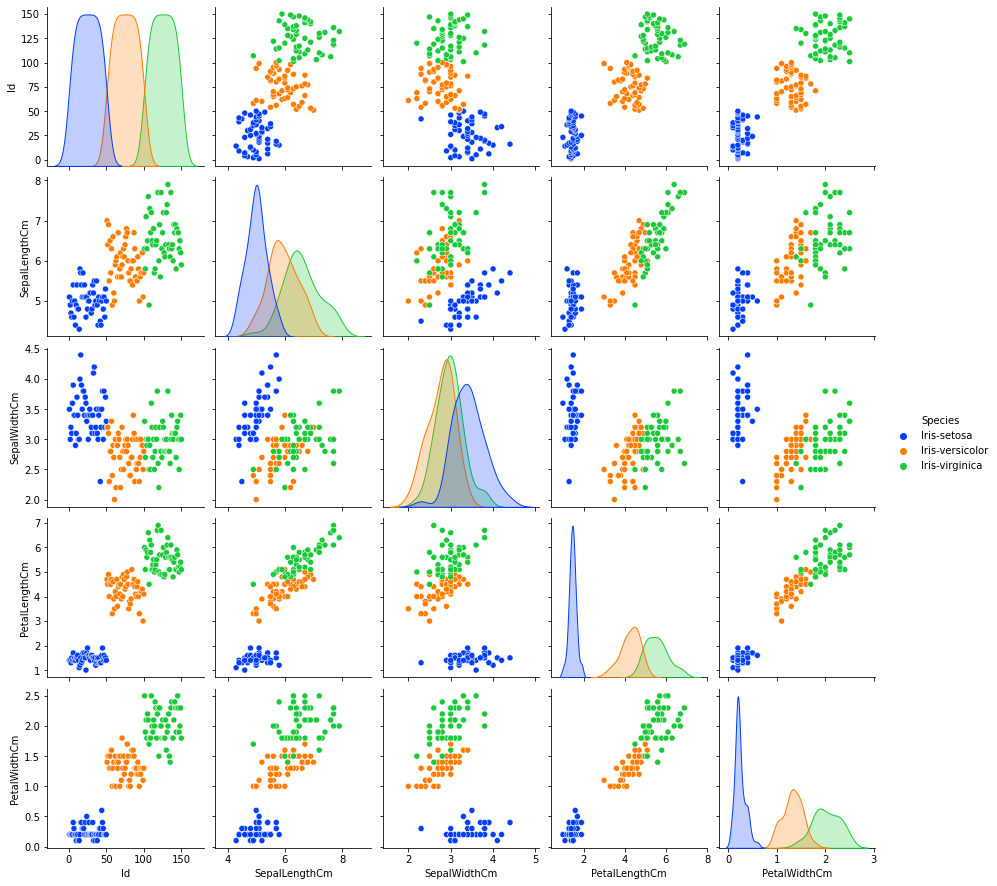

In [17]:
sns.pairplot(df, hue="Species", diag_kind="kde", palette="bright")
plt.savefig(r'D:\Users\side project\dataset\iris\iris.png')

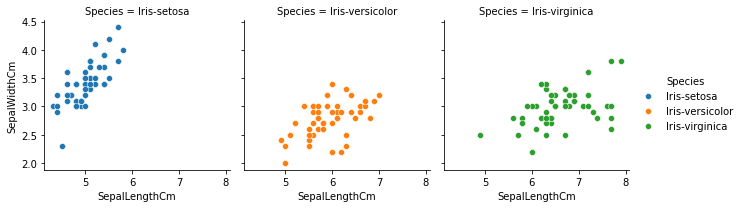

In [20]:
g = sns.FacetGrid(df, col="Species", hue="Species")
g.map(sns.scatterplot, "SepalLengthCm", "SepalWidthCm").add_legend()

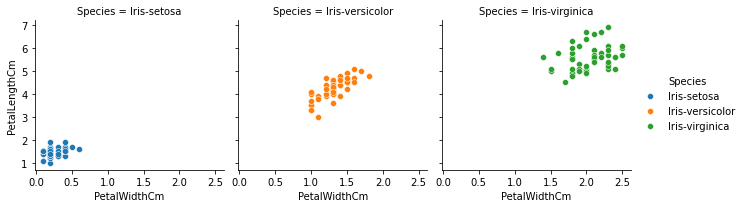

In [22]:
g = sns.FacetGrid(df, col="Species", hue="Species")
g.map(sns.scatterplot, "PetalWidthCm", "PetalLengthCm").add_legend()

In [23]:
# 讀入鳶尾花資料
iris = load_iris()

In [24]:
iris_X = iris.data

In [25]:
iris_y = iris.target

In [26]:
# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size = 0.3)

In [27]:
# 建立分類器
clf = tree.DecisionTreeClassifier()
iris_clf = clf.fit(train_X, train_y)

In [28]:
# 預測
test_y_predicted = iris_clf.predict(test_X)

In [29]:
# 評估
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.9555555555555556


In [30]:
from  sklearn.metrics import classification_report

label_name = ['0','1','2']
print(classification_report(test_y, test_y_predicted,target_names=label_name))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        14
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Text(0.5, 15.0, 'Pred')

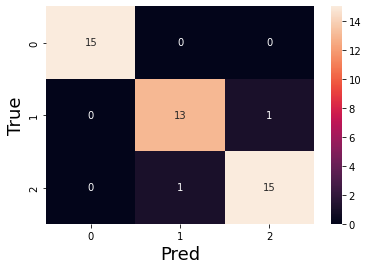

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

label_name = ['0','1','2']
#生成混淆矩阵
conf_mat = confusion_matrix(test_y, test_y_predicted)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=label_name, yticklabels=label_name)
plt.ylabel('True',fontsize=18)
plt.xlabel('Pred',fontsize=18)

In [56]:
import xgboost as xgb
params = { 'max_depth': 3, 
      'objective': 'multi:softmax',
      'eval_metric': 'merror', 
      'num_class': 5,
      'learning_rate': 0.1, 
      'silent': True,
      'subsample': 0.8,}
num_round = 10

In [57]:
dtrain = xgb.DMatrix(data=train_X, label=train_y) 
dtest = xgb.DMatrix(data=test_X)

In [58]:
model = xgb.train(params, dtrain, num_round) 
y_pred = model.predict(dtest) 

[14:06:38] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [59]:
from sklearn.metrics import classification_report 
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.96        14
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Text(0.5, 15.0, 'Pred')

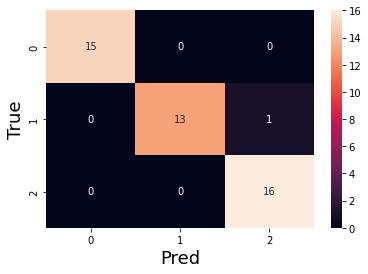

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
# y_pred = y_pred.argmax(axis = 1)
label_name = ['0','1','2']
#生成混淆矩阵
conf_mat = confusion_matrix(test_y, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=label_name, yticklabels=label_name)
plt.ylabel('True',fontsize=18)
plt.xlabel('Pred',fontsize=18)